# NAME-PAPU SWAIN

## PROJECT-02(Income Qualification in Latin America)

OBJECTIVE-Identify the level of income qualification needed for the families in Latin America.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv",index_col=0)
test=pd.read_csv("test.csv",index_col=0)

In [3]:
train.shape,test.shape

((9557, 142), (23856, 141))

In [4]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
Id,,,,,,,,,,,,,,,,,,,,,
ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


### From the above,it's clear that Target column is the output variable.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9557 entries, ID_279628684 to ID_a38c64491
Columns: 142 entries, v2a1 to Target
dtypes: float64(8), int64(130), object(4)
memory usage: 10.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23856 entries, ID_2f6873615 to ID_34754556f
Columns: 141 entries, v2a1 to agesq
dtypes: float64(8), int64(129), object(4)
memory usage: 25.8+ MB


### Understand the type of data

In [8]:
train.describe(include="object")

,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557
unique,2988,31,22,22
top,fd8a6d014,yes,no,no
freq,13,2192,3762,6230


In [9]:
test.describe(include="object")

,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856
unique,7352,35,22,22
top,8e9159699,yes,no,no
freq,13,5388,9056,15845


In [10]:
train["idhogar"].unique()

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

In [11]:
train["dependency"].value_counts()[:10]

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
Name: dependency, dtype: int64

In [12]:
train["dependency"][train["dependency"].isin(["yes","no"])==False].value_counts().head(1)

.5    1497
Name: dependency, dtype: int64

In [13]:
train.dependency[train.dependency.isin(["yes","no"])==False].mode()

0    .5
dtype: object

In [14]:
train["dependency"]=train["dependency"].replace("yes",0.5).replace("no",0).astype("float")
test["dependency"]=test["dependency"].replace("yes",0.5).replace("no",0).astype("float")

### changed object datatype to float of dependency column

In [15]:
train.edjefe[train.edjefe.isin(["yes","no"])==False].astype("float")

Id
ID_279628684    10.0
ID_f29eb3ddd    12.0
ID_d671db89c    11.0
ID_d56d6f5f5    11.0
ID_ec05b1a7b    11.0
                ... 
ID_d45ae367d     9.0
ID_c94744e07     9.0
ID_85fc658f8     9.0
ID_ced540c61     9.0
ID_a38c64491     9.0
Name: edjefe, Length: 5672, dtype: float64

In [16]:
train.edjefe[train.edjefe.isin(["yes","no"])==False].astype("float").median()

7.0

In [17]:
np.median(train.edjefe[train.edjefe.isin(["yes","no"])==False].astype("float"))

7.0

In [18]:
med=np.median(train.edjefe[train.edjefe.isin(["yes","no"])==False].astype("float"))
train["edjefe"]=train["edjefe"].replace("yes",med).replace("no",0).astype("float")
test["edjefe"]=test["edjefe"].replace("yes",med).replace("no",0).astype("float")

### changed object datatype to float of edjefe column

In [19]:
med=np.median(train.edjefa[train.edjefa.isin(["yes","no"])==False].astype("float"))
train["edjefa"]=train["edjefa"].replace("yes",med).replace("no",0).astype("float")
test["edjefa"]=test["edjefa"].replace("yes",med).replace("no",0).astype("float")

### changed object datatype to float of edjefa column

In [20]:
train.describe(include="object")

,idhogar
count,9557
unique,2988
top,fd8a6d014
freq,13


### Count how many null values are existing in columns

In [21]:
train.isna().sum().sort_values(ascending=False)[:10]

rez_esc         7928
v18q1           7342
v2a1            6860
SQBmeaned          5
meaneduc           5
hogar_adul         0
parentesco10       0
parentesco11       0
parentesco12       0
idhogar            0
dtype: int64

In [22]:
test.isna().sum().sort_values(ascending=False)[:10]

rez_esc         19653
v18q1           18126
v2a1            17403
SQBmeaned          31
meaneduc           31
hogar_adul          0
parentesco10        0
parentesco11        0
parentesco12        0
idhogar             0
dtype: int64

### Training dataset

In [23]:
print("The percentage of missing values in rez_esc is ",(train["rez_esc"].isna().sum()/train.shape[0]))
print("The percentage of missing values in v18q1 is ",(train["v18q1"].isna().sum()/train.shape[0]))
print("The percentage of missing values in v2a1 is ",(train["v2a1"].isna().sum()/train.shape[0]))

The percentage of missing values in rez_esc is  0.8295490216595166
The percentage of missing values in v18q1 is  0.7682327090091032
The percentage of missing values in v2a1 is  0.717798472323951


### Testing dataset

In [24]:
print("The percentage of missing values in rez_esc is ",(test["rez_esc"].isna().sum()/test.shape[0]))
print("The percentage of missing values in v18q1 is ",(test["v18q1"].isna().sum()/test.shape[0]))
print("The percentage of missing values in v2a1 is ",(test["v2a1"].isna().sum()/test.shape[0]))

The percentage of missing values in rez_esc is  0.823817907444668
The percentage of missing values in v18q1 is  0.7598088531187123
The percentage of missing values in v2a1 is  0.7295020120724346


In [25]:
train.shape,test.shape

((9557, 142), (23856, 141))

In [26]:
train.drop(columns=["rez_esc","v18q1","v2a1"],inplace=True)
test.drop(columns=["rez_esc","v18q1","v2a1"],inplace=True)

In [27]:
train.shape,test.shape

((9557, 139), (23856, 138))

In [28]:
train.isna().sum().sort_values(ascending=False)

SQBmeaned          5
meaneduc           5
hacdor             0
hogar_total        0
parentesco11       0
                  ..
abastaguano        0
abastaguafuera     0
abastaguadentro    0
cielorazo          0
Target             0
Length: 139, dtype: int64

In [29]:
train.columns[train.isna().any()]

Index(['meaneduc', 'SQBmeaned'], dtype='object')

In [30]:
null=train.columns[train.isna().any()]
train[null].isna().sum()

meaneduc     5
SQBmeaned    5
dtype: int64

In [31]:
test.isna().sum().sort_values(ascending=False)

SQBmeaned          31
meaneduc           31
hacdor              0
hogar_mayor         0
parentesco10        0
                   ..
abastaguano         0
abastaguafuera      0
abastaguadentro     0
cielorazo           0
agesq               0
Length: 138, dtype: int64

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(train[["SQBmeaned","meaneduc"]])

SimpleImputer(strategy='median')

In [34]:
train[["SQBmeaned","meaneduc"]]=imputer.transform(train[["SQBmeaned","meaneduc"]])
test[["SQBmeaned","meaneduc"]]=imputer.transform(test[["SQBmeaned","meaneduc"]])

In [35]:
train.isna().sum().sort_values(ascending=False)

hacdor             0
hogar_total        0
parentesco11       0
parentesco12       0
idhogar            0
                  ..
abastaguano        0
abastaguafuera     0
abastaguadentro    0
cielorazo          0
Target             0
Length: 139, dtype: int64

In [36]:
train.isna().any().sum()

0

In [37]:
test.isna().any().sum()

0

### Removed null values from the dataset in the above.

## Check if there are any biases in your dataset.

Text(0.5, 1.0, 'Checking of bias condition on Target variable')

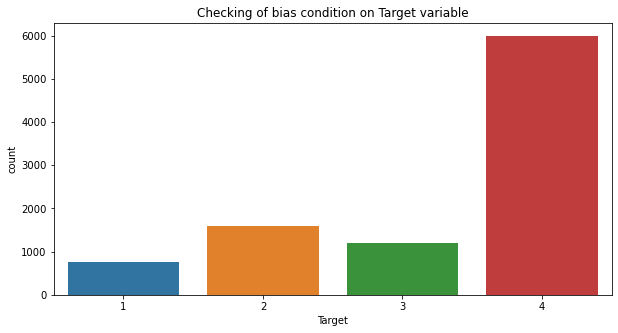

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x="Target",data=train)
plt.title("Checking of bias condition on Target variable")

In [39]:
train["Target"].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

### Since,the 4 has highest value as compared to others.So,there are  biases in the dataset.

## Check whether all members of the house have the same poverty level.

In [40]:
train.groupby(["idhogar"])["Target"].nunique()>1

idhogar
001ff74ca    False
003123ec2    False
004616164    False
004983866    False
005905417    False
             ...  
ff9343a35    False
ff9d5ab17    False
ffae4a097    False
ffe90d46f    False
fff7d6be1    False
Name: Target, Length: 2988, dtype: bool

In [41]:
print("House id with different poverty level: ")
(train.groupby(["idhogar"])["Target"].nunique()>1).index

House id with different poverty level: 


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

## Check if there is a house without a family head.

In [42]:
train.groupby(["idhogar"])["parentesco1"].sum()==0

idhogar
001ff74ca    False
003123ec2    False
004616164    False
004983866    False
005905417    False
             ...  
ff9343a35    False
ff9d5ab17    False
ffae4a097    False
ffe90d46f    False
fff7d6be1    False
Name: parentesco1, Length: 2988, dtype: bool

In [43]:
print("House id without a family head:")
(train.groupby(["idhogar"])["parentesco1"].sum()==0).index

House id without a family head:


Index(['001ff74ca', '003123ec2', '004616164', '004983866', '005905417',
       '006031de3', '006555fe2', '00693f597', '006b64543', '00941f1f4',
       ...
       'ff250fd6c', 'ff31b984b', 'ff38ddef1', 'ff6d16fd0', 'ff703eed4',
       'ff9343a35', 'ff9d5ab17', 'ffae4a097', 'ffe90d46f', 'fff7d6be1'],
      dtype='object', name='idhogar', length=2988)

## Set poverty level of the members and the head of the house within a family.

In [44]:
Target_mean=train.groupby("idhogar")["Target"].mean().astype("int64").reset_index().rename(columns={"Target":"Target_mean"})
Target_mean

,idhogar,Target_mean
0,001ff74ca,4
1,003123ec2,2
2,004616164,2
3,004983866,3
4,005905417,2
...,...,...
2983,ff9343a35,4
2984,ff9d5ab17,4
2985,ffae4a097,4
2986,ffe90d46f,1


In [45]:
train=train.merge(Target_mean,on="idhogar",how="left")
train.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Target_mean
0,0,3,0,1,1,0,0,1,1,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,4
1,0,4,0,1,1,1,0,1,1,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,4
2,0,8,0,1,1,0,0,0,0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4,4
3,0,5,0,1,1,1,0,2,2,1,...,289,16,121,4,1.777778,1.0,121.0,289,4,4
4,0,5,0,1,1,1,0,2,2,1,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,4


In [46]:
train.Target=train.Target_mean
train.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Target_mean
0,0,3,0,1,1,0,0,1,1,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,4
1,0,4,0,1,1,1,0,1,1,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,4
2,0,8,0,1,1,0,0,0,0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4,4
3,0,5,0,1,1,1,0,2,2,1,...,289,16,121,4,1.777778,1.0,121.0,289,4,4
4,0,5,0,1,1,1,0,2,2,1,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,4


In [47]:
train.drop("Target_mean",axis=1,inplace=True)
train.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## Prediction model for machine learning

In [48]:
print("Shape of train dataset: ",(train.shape))
train.drop("idhogar",axis=1,inplace=True)
print("Shape of train dataset: ",(train.shape))

Shape of train dataset:  (9557, 139)
Shape of train dataset:  (9557, 138)


In [49]:
print("Shape of test dataset: ",(test.shape))
test.drop("idhogar",axis=1,inplace=True)
print("Shape of test.csv dataset: ",(test.shape))

Shape of test dataset:  (23856, 138)
Shape of test.csv dataset:  (23856, 137)


In [50]:
x=train.drop(["Target"],axis=1)
y=train[["Target"]]

In [51]:
x.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0,3,0,1,1,0,0,1,1,0,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,0,4,0,1,1,1,0,1,1,0,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,0,8,0,1,1,0,0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,0,5,0,1,1,1,0,2,2,1,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,0,5,0,1,1,1,0,2,2,1,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [52]:
y.head()

,Target
0,4
1,4
2,4
3,4
4,4


## Predict the accuracy using random forest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_model=RandomForestClassifier(min_samples_leaf=10,min_samples_split=10,random_state=25)
rf_model.fit(x,y)

RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,
                       random_state=25)

In [55]:
pred=rf_model.predict(x)
pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [57]:
confusion_matrix(y_pred=pred,y_true=y)

array([[ 546,   14,    0,  298],
       [   3, 1075,    1,  496],
       [   9,   39,  522,  584],
       [   8,    6,    1, 5955]], dtype=int64)

In [58]:
accuracy_score(y_pred=pred,y_true=y)

0.8473370304488856

In [59]:
classification_report(y_pred=pred,y_true=y)

'              precision    recall  f1-score   support\n\n           1       0.96      0.64      0.77       858\n           2       0.95      0.68      0.79      1575\n           3       1.00      0.45      0.62      1154\n           4       0.81      1.00      0.90      5970\n\n    accuracy                           0.85      9557\n   macro avg       0.93      0.69      0.77      9557\nweighted avg       0.87      0.85      0.83      9557\n'

## Check the accuracy using random forest with cross validation

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
cv=cross_val_score(rf_model,x,y,scoring="accuracy",cv=10)
cv

array([0.63807531, 0.64958159, 0.64435146, 0.63598326, 0.66108787,
       0.66004184, 0.62970711, 0.62094241, 0.60837696, 0.61361257])

In [62]:
min(cv)

0.6083769633507854

In [63]:
np.mean(cv)

0.636176038905562

In [64]:
max(cv)

0.6610878661087866

#                                     Thank you!!!